Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [517]:
#importing the libary
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [518]:
# print top data

df1=pd.read_csv(r'D:\Vishakha_eval\3\Automobile_insurance_fraud.csv')

df1.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17/10/2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27/06/2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,6/09/2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25/05/1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,6/06/2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [519]:
df1 = pd.read_csv(r'D:\Vishakha_eval\3\Automobile_insurance_fraud.csv', 
                   usecols= ['months_as_customer', 
                             'age', 
                             'policy_bind_date',
                             'policy_state',
                             'policy_csl',
                             'policy_deductable',
                             'policy_annual_premium',
                             'umbrella_limit',
                             'insured_zip',
                             'insured_sex',
                             'insured_education_level',
                             'insured_occupation',
                             'insured_hobbies',
                             'insured_relationship',
                             'capital-gains',
                             'capital-loss',
                             'incident_date',
                             'incident_type',
                             'collision_type',
                             'incident_severity',
                             'authorities_contacted',
                             'incident_state',
                             'incident_city',
                             'incident_hour_of_the_day',
                             'number_of_vehicles_involved',
                             'property_damage',
                             'bodily_injuries',
                             'witnesses',
                             'police_report_available',
                             'total_claim_amount',
                             'injury_claim',
                             'property_claim',
                             'vehicle_claim',
                             'auto_year',
                             'fraud_reported'], 
                   na_values=['?'], na_filter = True, parse_dates = ['policy_bind_date','incident_date'], dayfirst = True)

In [520]:
df1.shape

(1000, 35)

In [521]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_bind_date             1000 non-null   datetime64[ns]
 3   policy_state                 1000 non-null   object        
 4   policy_csl                   1000 non-null   object        
 5   policy_deductable            1000 non-null   int64         
 6   policy_annual_premium        1000 non-null   float64       
 7   umbrella_limit               1000 non-null   int64         
 8   insured_zip                  1000 non-null   int64         
 9   insured_sex                  1000 non-null   object        
 10  insured_education_level      1000 non-null   object        
 11  insured_occupation           1000 non-null  

In [522]:
df1.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [523]:
df1.columns.values

array(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage',
       'bodily_injuries', 'witnesses', 'police_report_available',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim', 'auto_year', 'fraud_reported'], dtype=object)

In [524]:
df1.isnull().sum()

months_as_customer               0
age                              0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_availa

In [525]:
df1.shape

(1000, 35)

# Cleaning the data

In [526]:
df1 = df1.replace('?',np.NaN)
df1.isnull().any()

months_as_customer             False
age                            False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                  True
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
property_damage                 True
bodily_injuries                False
w

In [527]:
df1.shape

(1000, 35)

In [528]:
df1.collision_type.unique()                  

array(['Side Collision', nan, 'Rear Collision', 'Front Collision'],
      dtype=object)

In [529]:
df1.property_damage.unique() 

array(['YES', nan, 'NO'], dtype=object)

In [530]:
df1.police_report_available.unique()         

array(['YES', nan, 'NO'], dtype=object)

In [531]:
df1['collision_type'].fillna(df1['collision_type'].value_counts().index[0], inplace = True)

In [532]:
df1['property_damage'].fillna(df1['property_damage'].value_counts().index[0], inplace = True)

In [533]:
df1['police_report_available'].fillna(df1['police_report_available'].value_counts().index[0], inplace = True)

In [534]:
df1.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,1,2,YES,71610,6510,13020,52080,2004,Y
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,NO,0,0,NO,5070,780,780,3510,2007,Y
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,2,3,NO,34650,7700,3850,23100,2007,N
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NO,1,2,NO,63400,6340,6340,50720,2014,Y
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,0,1,NO,6500,1300,650,4550,2009,N


In [535]:
df1.to_csv('D:\cleaning.csv', index = False)

In [536]:
df1.isna().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

In [537]:
df1.dtypes

months_as_customer                      int64
age                                     int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted                  object
incident_state                    

EDA 

In [538]:
df1['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

247 cases of fraud were reported and 753 weren't reported ever

In [539]:
df1.age.max()

64

In [540]:
df1['age_bins'] = pd.cut(df1.age, bins = [0, 10, 20, 30, 40, 50, 60, 70], include_lowest = True, labels = ['0-10','11-20','21-30','31-40', '41-50', '51-60', '61-70'])

In [541]:
age_vs_fraud = pd.crosstab(df1['age_bins'],df1['fraud_reported'])

In [542]:
age_vs_fraud

fraud_reported,N,Y
age_bins,,
11-20,1,1
21-30,150,45
31-40,302,94
41-50,221,72
51-60,66,30
61-70,13,5


<AxesSubplot:xlabel='age_bins'>

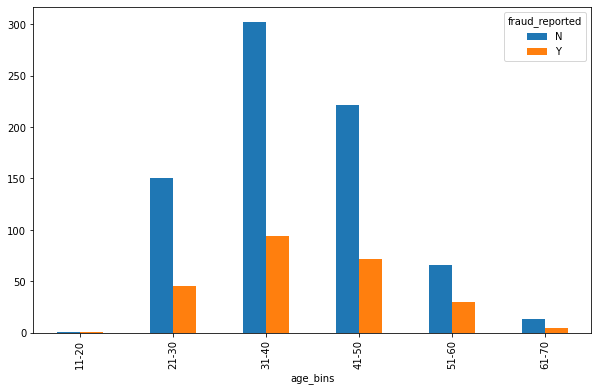

In [543]:
age_vs_fraud.plot(kind = 'bar', figsize = (10,6))

highest no. of frauds have been reported in the age range of 30-40. Since, fraud detection is highly dependent on age, so age becomes a top parameter for modeling.

In [544]:
incisev_vs_fraud = pd.crosstab(df1['incident_severity'], df1['fraud_reported'])

In [545]:
incisev_vs_fraud

fraud_reported,N,Y
incident_severity,,
Major Damage,109,167
Minor Damage,316,38
Total Loss,244,36
Trivial Damage,84,6


<AxesSubplot:xlabel='incident_severity'>

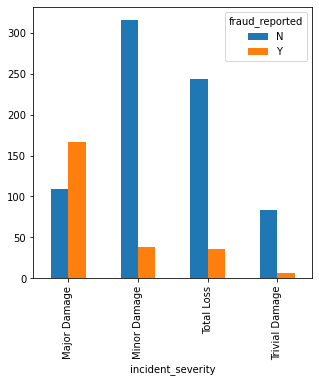

In [546]:
incisev_vs_fraud.plot(kind = 'bar', figsize = (5,5))

As we can observe that incidents involving minor damage have higher cases of fraud report. Hence, incident_severity becomes a parameter for modeling.

In [547]:
print(df1.total_claim_amount.min())
print(df1.total_claim_amount.max())

100
114920


In [548]:
df1['total_claim_bins'] = pd.cut(df1.total_claim_amount, bins = [0, 11500, 33000, 44800, 56300, 67800, 79300, 90800, 102300, 113800, 125300], include_lowest = True, labels = ['0-11500','11501-33000','33001-44800','444801-56300', '56301-67800', '67801-79300', '79301-90800','90801-102300','102301-113800','113801-125300'])

In [549]:
total_claim_vs_fraud = pd.crosstab(df1.total_claim_bins, df1.fraud_reported)

In [550]:
total_claim_vs_fraud

fraud_reported,N,Y
total_claim_bins,,
0-11500,162,16
11501-33000,19,3
33001-44800,63,19
444801-56300,127,58
56301-67800,174,58
67801-79300,118,57
79301-90800,64,24
90801-102300,20,9
102301-113800,5,3


<AxesSubplot:xlabel='total_claim_bins'>

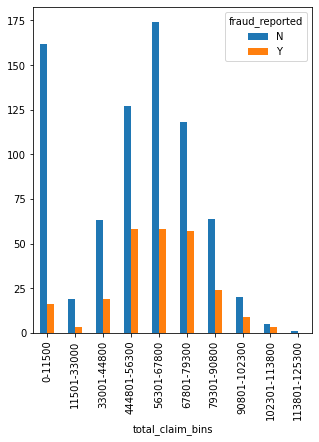

In [551]:
total_claim_vs_fraud.plot(kind = 'bar', figsize = (5,6))

 significant amount of variation in reporting of fraud cases according to the Total insurance claim amount. Since there is visibly good variation, it becomes a very important parameter for modeling.

In [552]:
gender_wise_fraud = pd.crosstab(df1.insured_sex, df1.fraud_reported)

In [553]:
gender_wise_fraud

fraud_reported,N,Y
insured_sex,,
FEMALE,411,126
MALE,342,121


<AxesSubplot:xlabel='insured_sex'>

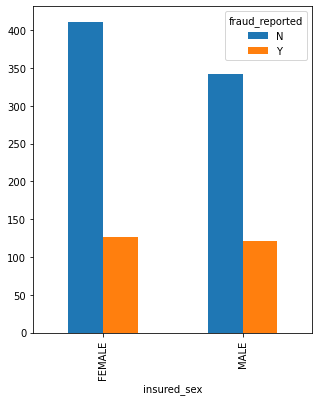

In [554]:
gender_wise_fraud.plot(kind = 'bar', figsize = (5,6))

Gender becomes an important parameter to figure out the no. of cases reported overall. Female leads with highest number of fraud reported cases.

In [555]:
print(df1.policy_annual_premium.min())
print(df1.policy_annual_premium.max())

433.33
2047.59


In [556]:
df1['policy_premium_bins'] = pd.cut(df1.policy_annual_premium, bins = [0, 500, 1000, 1500, 2000], include_lowest = True, labels = ['0-500','501-1000','1001-1500','1501-2000'])

In [557]:
policy_premium_vs_fraud = pd.crosstab(df1.policy_premium_bins, df1.fraud_reported)

In [558]:
policy_premium_vs_fraud

fraud_reported,N,Y
policy_premium_bins,,
0-500,1,1
501-1000,107,44
1001-1500,529,164
1501-2000,115,38


<AxesSubplot:xlabel='policy_premium_bins'>

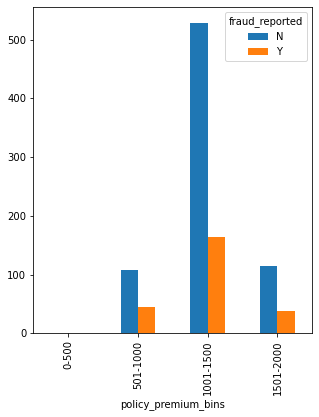

In [559]:
policy_premium_vs_fraud.plot(kind = 'bar', figsize = (5,6))

It is clearly visible that fraud reporting is highly dependent on policy premium amount.

Feature Selection

In [560]:
df1[['policy_state', 'insured_education_level', 'insured_occupation','incident_type', 'collision_type', 'incident_severity', 'authorities_contacted']].describe()

,policy_state,insured_education_level,insured_occupation,incident_type,collision_type,incident_severity,authorities_contacted
count,1000,1000,1000,1000,1000,1000,1000
unique,3,7,14,4,3,4,5
top,OH,JD,machine-op-inspct,Multi-vehicle Collision,Rear Collision,Minor Damage,Police
freq,352,161,93,419,470,354,292


drop insured_education_level, insured_occupation, authorities_contacted since they have very high unique values which will lead to higher number of independent states. Also, dropping other columns that wouldn't be required for modeling.

In [561]:
df1.drop(columns = ['policy_bind_date','policy_csl','insured_zip','insured_education_level','insured_occupation', 'insured_occupation','insured_hobbies','insured_relationship', 'incident_date', 'incident_state', 'incident_city', 'incident_type', 'authorities_contacted', 'property_damage', 'injury_claim', 'property_claim', 'vehicle_claim','age_bins', 'total_claim_bins', 'policy_premium_bins'], axis = 1, inplace = True)

In [562]:
df1.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,capital-gains,capital-loss,collision_type,incident_severity,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_year,fraud_reported
0,328,48,OH,1000,1406.91,0,MALE,53300,0,Side Collision,Major Damage,5,1,1,2,YES,71610,2004,Y
1,228,42,IN,2000,1197.22,5000000,MALE,0,0,Rear Collision,Minor Damage,8,1,0,0,NO,5070,2007,Y
2,134,29,OH,2000,1413.14,5000000,FEMALE,35100,0,Rear Collision,Minor Damage,7,3,2,3,NO,34650,2007,N
3,256,41,IL,2000,1415.74,6000000,FEMALE,48900,-62400,Front Collision,Major Damage,5,1,1,2,NO,63400,2014,Y
4,228,44,IL,1000,1583.91,6000000,MALE,66000,-46000,Rear Collision,Minor Damage,20,1,0,1,NO,6500,2009,N


In [563]:
df1.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
capital-gains                    int64
capital-loss                     int64
collision_type                  object
incident_severity               object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
police_report_available         object
total_claim_amount               int64
auto_year                        int64
fraud_reported                  object
dtype: object

categorical variable to numerical

In [564]:
data_onehot = df1[['policy_state','insured_sex', 'collision_type', 'incident_severity', 'police_report_available']]

In [565]:
from sklearn.preprocessing import OneHotEncoder

In [566]:
enc = OneHotEncoder(sparse = False)

In [567]:
enc.fit(data_onehot)

OneHotEncoder(sparse=False)

In [568]:
data_onehot_transformed = enc.transform(data_onehot)

In [569]:
data_onehot_transformed

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [570]:
data_onehot_transformed.shape

(1000, 14)

In [571]:
columns = ['OH', 'IN', 'IL', 'Insured_Male', 'Insured_Female','Side_Collison','Rear _Collison','Front Collison','Major Damage','Minor Damage','Total Loss','Trivial Damage''Police Report available', 'Police report not available']

In [572]:
# Converting returned array into a DataFrame

df2 = pd.DataFrame(data_onehot_transformed, columns = ['OH', 'IN', 'IL', 'Insured_Male', 'Insured_Female', 'Side_Collison','Rear _Collison','Front Collison', 'Major Damage','Minor Damage','Total Loss','Trivial Damage', 'Police Report available', 'Police report not available'])

In [573]:
df2.head()

,OH,IN,IL,Insured_Male,Insured_Female,Side_Collison,Rear _Collison,Front Collison,Major Damage,Minor Damage,Total Loss,Trivial Damage,Police Report available,Police report not available
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [574]:
df1 = pd.concat([df1, df2], axis = 1)

In [575]:
df1.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,capital-gains,capital-loss,collision_type,...,Insured_Female,Side_Collison,Rear _Collison,Front Collison,Major Damage,Minor Damage,Total Loss,Trivial Damage,Police Report available,Police report not available
0,328,48,OH,1000,1406.91,0,MALE,53300,0,Side Collision,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,228,42,IN,2000,1197.22,5000000,MALE,0,0,Rear Collision,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,134,29,OH,2000,1413.14,5000000,FEMALE,35100,0,Rear Collision,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,256,41,IL,2000,1415.74,6000000,FEMALE,48900,-62400,Front Collision,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,228,44,IL,1000,1583.91,6000000,MALE,66000,-46000,Rear Collision,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [576]:
df1.drop(['policy_state','insured_sex','collision_type', 'incident_severity','police_report_available'], axis = 1, inplace = True)

In [577]:
df1.isna().sum()

months_as_customer             0
age                            0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
capital-gains                  0
capital-loss                   0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
bodily_injuries                0
witnesses                      0
total_claim_amount             0
auto_year                      0
fraud_reported                 0
OH                             0
IN                             0
IL                             0
Insured_Male                   0
Insured_Female                 0
Side_Collison                  0
Rear _Collison                 0
Front Collison                 0
Major Damage                   0
Minor Damage                   0
Total Loss                     0
Trivial Damage                 0
Police Report available        0
Police report not available    0
dtype: int64

In [578]:
df1.dtypes

months_as_customer               int64
age                              int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
capital-gains                    int64
capital-loss                     int64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
total_claim_amount               int64
auto_year                        int64
fraud_reported                  object
OH                             float64
IN                             float64
IL                             float64
Insured_Male                   float64
Insured_Female                 float64
Side_Collison                  float64
Rear _Collison                 float64
Front Collison                 float64
Major Damage                   float64
Minor Damage                   float64
Total Loss                     float64
Trivial Damage           

In [579]:
df1['fraud_reported'] = df1['fraud_reported'].replace({'Y': 1, 'N': 0})

In [580]:
df1['fraud_reported'].head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

Modeling

In [581]:
X = df1.drop('fraud_reported', axis= 1)
X.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,Insured_Female,Side_Collison,Rear _Collison,Front Collison,Major Damage,Minor Damage,Total Loss,Trivial Damage,Police Report available,Police report not available
0,328,48,1000,1406.91,0,53300,0,5,1,1,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,228,42,2000,1197.22,5000000,0,0,8,1,0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [582]:
X.dtypes

months_as_customer               int64
age                              int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
capital-gains                    int64
capital-loss                     int64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
total_claim_amount               int64
auto_year                        int64
OH                             float64
IN                             float64
IL                             float64
Insured_Male                   float64
Insured_Female                 float64
Side_Collison                  float64
Rear _Collison                 float64
Front Collison                 float64
Major Damage                   float64
Minor Damage                   float64
Total Loss                     float64
Trivial Damage                 float64
Police Report available  

In [583]:
y = df1['fraud_reported']
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

In [584]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False, random_state=4 )

In [586]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (700, 27) (700,)
Test set: (300, 27) (300,)


Support Vector Machines(SVM)

In [601]:
#Algorithms
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

import os, sys

In [602]:
from sklearn import svm
data_svm = svm.SVC(kernel = 'rbf', probability = True)

In [603]:
data_svm.fit(X_train,y_train)

SVC(probability=True)

In [604]:
ypred_svm = data_svm.predict(X_test)
ypred_svm[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [609]:
acc_jacc_svm = jaccard_score(ypred_svm, y_test).round(2)
acc_jacc_svm

0.0

In [610]:
acc_f1_svm = f1_score(y_test, ypred_svm, average = 'weighted').round(2)
acc_f1_svm

0.66

In [611]:
# For log loss
ypred_svm_logloss = data_svm.predict_proba(X_test)[:,1]
print(ypred_svm_logloss[0:10])

[0.25030242 0.25098646 0.2509827  0.25099349 0.25098078 0.25098944
 0.25100027 0.25100151 0.25099976 0.25098431]


In [612]:
acc_logloss_svm = log_loss(y_test, ypred_svm_logloss, eps=1e-15, normalize = True).round(2)
acc_logloss_svm

0.55

Decision Trees

Finding probabilities for log_loss

In [615]:
from sklearn.tree import DecisionTreeClassifier

loanTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)
loanTree

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [616]:
loanTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [617]:
ypred_tree = loanTree.predict(X_test)
ypred_tree[0:10]

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [619]:
acc_jacc_dt = jaccard_score(ypred_tree, y_test).round(2)
acc_jacc_dt

0.44

In [620]:
acc_f1_dt = f1_score(ypred_tree, y_test, average ='weighted').round(2)
acc_f1_dt

0.81

Finding probabilities for log_loss

In [622]:
ypred_tree_logloss = loanTree.predict_proba(X_test)[:,1]
ypred_tree_logloss[0:10]

array([1.        , 0.65517241, 0.19512195, 0.        , 0.5875    ,
       0.3       , 0.1372549 , 0.19512195, 0.        , 0.1372549 ])

In [623]:
y_test[:15]

700    1
701    1
702    0
703    1
704    1
705    1
706    0
707    1
708    1
709    1
710    1
711    0
712    1
713    1
714    0
Name: fraud_reported, dtype: int64

In [631]:
acc_logloss_dt = log_loss(y_test, ypred_tree_logloss, eps=1e-15, normalize = True).round(2)
acc_logloss_dt

2.72

Logistic Regression

In [626]:
LR = LogisticRegression(C = 0.01, solver = 'liblinear')

In [627]:
LR.fit(X_train, y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [628]:
ypred_logreg = LR.predict(X_test)
ypred_logreg[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [630]:
acc_jacc_LR = jaccard_score(ypred_logreg, y_test).round(2)
acc_jacc_LR

0.0

In [632]:
acc_f1_LR = f1_score(ypred_logreg, y_test, average ='weighted').round(2)
acc_f1_LR

0.86

In [633]:
# Predicting probailities for Log loss

ypred_logreg_logloss = LR.predict_proba(X_test)[:,1]
ypred_logreg_logloss[0:10]

array([0.37539227, 0.19691347, 0.1295353 , 0.26196544, 0.20596846,
       0.23904114, 0.32140372, 0.33933057, 0.3121438 , 0.24582143])

In [634]:
acc_logloss_LR = log_loss(y_test, ypred_logreg, eps=1e-15, normalize = True).round(2)
acc_logloss_LR

8.29

K Nearest Neighbor(KNN)

In [636]:
from sklearn.neighbors import KNeighborsClassifier

Training and Predicting with variable k

In [638]:
ks = 15

mean_acc = np.zeros((ks - 1))
std_acc = np.zeros((ks-1))

In [640]:
for n in range(3, ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X, y)
    y_predicted = neigh.predict(X_test)
    mean_acc[n-1] = jaccard_score(y_test, y_predicted)
    std_acc[n-1]=np.std(y_predicted==y_test)/np.sqrt(y_predicted.shape[0])

print(mean_acc)

[0.         0.         0.37634409 0.2        0.26506024 0.1369863
 0.18181818 0.13513514 0.13157895 0.08108108 0.09210526 0.04
 0.06578947 0.04      ]


In [641]:
knn_jaccard = mean_acc.max().round(2)
knn_jaccard

0.38

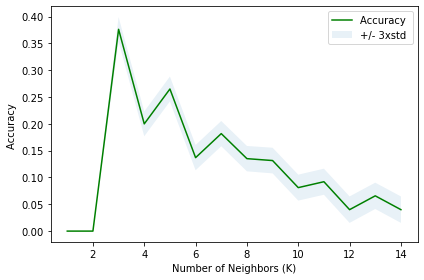

In [642]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [643]:
knn_f1_score = f1_score(y_test, y_predicted, average = 'weighted').round(2)
knn_f1_score

0.67

In [644]:
#Log Loss

for n in range(3, ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X, y)
    y_predicted_knn = neigh.predict_proba(X_test)[:,1]

print(y_predicted_knn[0:10])

[0.35714286 0.14285714 0.         0.35714286 0.14285714 0.28571429
 0.35714286 0.35714286 0.14285714 0.28571429]


In [645]:
knn_logloss = log_loss(y_test, y_predicted_knn, eps=1e-15,normalize = True).round(2)
knn_logloss

0.49

Summary

In [646]:
finalreport = {'KNN':[knn_jaccard, knn_f1_score, knn_logloss], 'Decision Tree':[acc_jacc_dt, acc_f1_dt, acc_logloss_dt], 'SVM': [acc_jacc_svm, acc_f1_svm, acc_logloss_svm], 'Logistic Regression': [acc_jacc_LR,acc_f1_LR, acc_logloss_LR]}

In [647]:
finalreport

{'KNN': [0.38, 0.67, 0.49],
 'Decision Tree': [0.44, 0.81, 2.72],
 'SVM': [0.0, 0.66, 0.55],
 'Logistic Regression': [0.0, 0.86, 8.29]}

In [648]:
Report = pd.DataFrame(finalreport, index = ['Jacard\'s Index','F1 score','Log loss'])

In [649]:
Report

,KNN,Decision Tree,SVM,Logistic Regression
Jacard's Index,0.38,0.44,0.00,0.00
F1 score,0.67,0.81,0.66,0.86
Log loss,0.49,2.72,0.55,8.29


Random Forest

In [651]:
from sklearn.ensemble import RandomForestClassifier

In [652]:
random_forest = RandomForestClassifier(n_estimators = 100, oob_score = True)
random_forest.fit(X_train, y_train)

RandomForestClassifier(oob_score=True)

In [653]:
yhat_rf = random_forest.predict(X_test)

In [655]:
acc_rf= round(random_forest.score(X_train, y_train)* 100, 2)
acc_rf

100.0

This is the accuracy on train data. Now, let's find accuracy on test data

In [656]:
acc_rf_test= round(random_forest.score(X_test, y_test)* 100, 2)
acc_rf_test

78.67

 the hyperparamter tuning for the parameters criterion, min_samples_leaf, min_samples_split and n_estimators.

In [658]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1, cv = 3)

In [659]:
clf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 70],
                         'min_samples_split': [2, 4, 10, 12, 16, 18, 25, 35],
                         'n_estimators': [100, 400, 700, 1000, 1500]})

In [660]:
clf.best_estimator_

RandomForestClassifier(min_samples_split=25, n_jobs=-1, oob_score=True,
                       random_state=1)

Using best params for modelling

In [661]:
random_forest_cv = RandomForestClassifier(criterion = 'gini', min_samples_leaf = 1, min_samples_split = 25, n_estimators = 100, max_features = 'auto', oob_score = True, random_state = 1, n_jobs = -1)
random_forest_cv.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=25, n_jobs=-1, oob_score=True,
                       random_state=1)

In [662]:
acc_rf= round(random_forest_cv.score(X_train, y_train)* 100, 2)
acc_rf

89.14

In [663]:
yhat_rf = random_forest_cv.predict(X_test)

In [664]:
acc_rf_test= round(random_forest_cv.score(X_test, y_test)* 100, 2)
acc_rf_test

83.33

In [665]:
print('oob score: ', round(random_forest_cv.oob_score, 3) * 100, '%')

oob score:  100 %
